In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [51]:
import snowflake.connector
import pandas as pd

# Function to load Google Gemini model and provide query as response

# Function to retrieve query from Snowflake database and return as a Pandas DataFrame
def read_snowflake_query(sql):
    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
        user='your_username',
        password='your_password',
        account='your_accountname',
        warehouse='your_warehouse',
        database='your_database',
        schema='you_schema'
    )
    # Execute the query and fetch all results
    df = pd.read_sql(sql, conn)
    
    # Close the connection
    conn.close()

    return df

# Example usage:
sql = "SELECT * FROM your_table;"
df = read_snowflake_query(sql)

In [52]:
df["StandardDateofJourney"] = pd.to_datetime(df["StandardDateofJourney"])

In [53]:
df["Journey_Day"] = df["StandardDateofJourney"].dt.day

In [54]:
df["Journey_Month"] = df["StandardDateofJourney"].dt.month

In [55]:
# df["Journey_DOW"] = df["StandardDateofJourney"].dt.dayofweek

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325182 entries, 0 to 325181
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   StandardDateofBooking  325182 non-null  object        
 1   StandardDateofJourney  325182 non-null  datetime64[ns]
 2   Month_of_Journey       325182 non-null  int64         
 3   Airline_Company        325182 non-null  object        
 4   Flight_Number          325182 non-null  object        
 5   Flight_Class           325182 non-null  object        
 6   Departure_Time         325182 non-null  object        
 7   Departure_City         325182 non-null  object        
 8   Arrival_Time           325182 non-null  object        
 9   Arrival_City           325182 non-null  object        
 10  Duration_in_mins       325182 non-null  float64       
 11  Total Stops            325182 non-null  object        
 12  Price                  325182 non-null  floa

In [57]:
df.drop("StandardDateofJourney",axis=1,inplace=True)

<Axes: xlabel='Journey_Month', ylabel='count'>

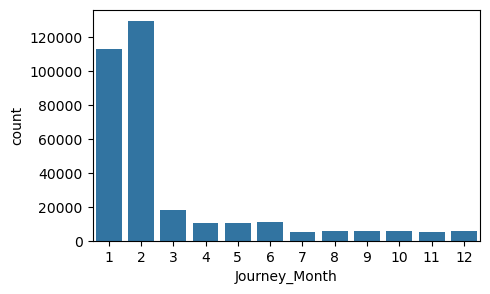

In [58]:
plt.figure(figsize=(5,3))
sns.countplot(x="Journey_Month", data=df)

In [59]:
# plt.figure(figsize=(6,3))
# sns.countplot(x="Journey_DOW", data=df)

In [60]:
# max_prices = df.groupby("Journey_DOW")["Price"].mean()
# plt.figure(figsize=(6, 3))
# plt.scatter(max_prices.index, max_prices.values, color='b', marker='o')
# plt.xlabel('Day of the Week')
# plt.ylabel('Max Price')
# plt.title('Max Price by Day of the Week')
# plt.show()

## Departure_Time

In [61]:
df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

/tmp/ipykernel_270171/207793956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour


In [62]:
df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute

/tmp/ipykernel_270171/2798108140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute


In [63]:
df.drop("Departure_Time",axis=1,inplace=True)

<Axes: xlabel='Dep_Hour', ylabel='Count'>

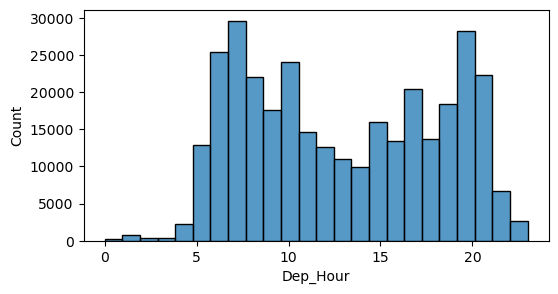

In [64]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Dep_Hour",bins=24)

## Arrival_Time

In [65]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

/tmp/ipykernel_270171/1971985902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


In [66]:
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

/tmp/ipykernel_270171/3257876746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [67]:
df.drop("Arrival_Time",axis=1,inplace=True)

<Axes: xlabel='Arrival_Hour', ylabel='Count'>

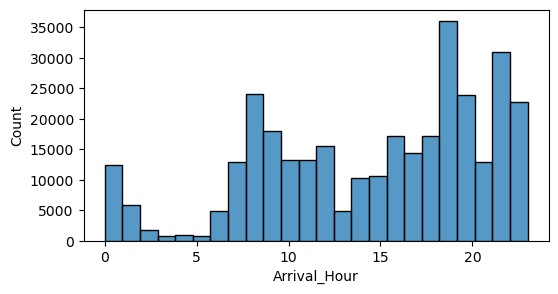

In [68]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Arrival_Hour",bins=24)

## Duration

<Axes: xlabel='Duration_in_mins', ylabel='Count'>

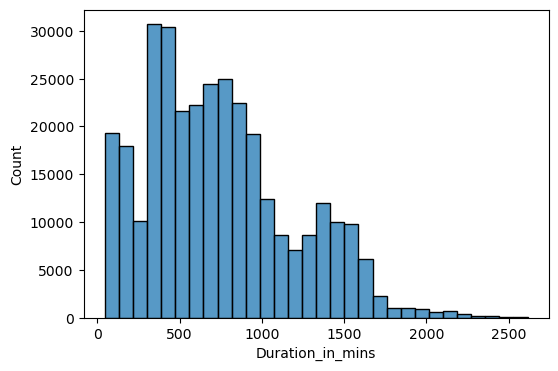

In [69]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Duration_in_mins",bins=30)

<Axes: xlabel='Duration_in_mins', ylabel='Price'>

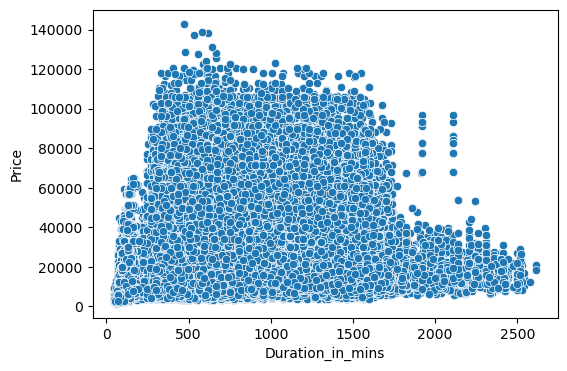

In [70]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Duration_in_mins", y="Price")

In [71]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# df['Optimal_Transformed_Duration'], _ = boxcox(df['Duration_in_mins'] + 1)

In [72]:
# df.drop(columns=['Duration_in_mins'], inplace=True)

# df.rename(columns={
#     'Optimal_Transformed_Duration': 'Duration_in_mins',

# }, inplace=True)

# # Verify the changes
# df.head()

In [73]:
df['Total Stops'].value_counts()

Total Stops
1-stop                                          264156
non-stop                                         37093
2+-stop                                          22026
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           1050
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         217
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          204
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           203
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati        59
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR             57
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ             47
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai          33
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             30
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB              7
Name: count, dtype: int64

In [74]:
# Clean up variations of '1-stop'
df['Total Stops'] = df['Total Stops'].apply(lambda x: '1-stop' if x.strip().startswith('1-stop') else x)

# Check the result
print(df['Total Stops'].value_counts())

Total Stops
1-stop      266063
non-stop     37093
2+-stop      22026
Name: count, dtype: int64


In [75]:
df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,
                                                         "1-stop" : 1,
                                                         "2+-stop" : 2})

/tmp/ipykernel_270171/1712726908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,


In [76]:
df.sample(20)

,StandardDateofBooking,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
195336,2023-01-15,5,Vistara,UK-918,ECONOMY,Ahmedabad,Chennai,675.0,1,15588.0,3,5,5,5,16,20
134519,2023-01-15,1,Vistara,UK-738,ECONOMY,Kolkata,Bangalore,815.0,2,13301.0,30,1,18,45,8,20
75305,2023-01-15,2,Vistara,UK-930,ECONOMY,Mumbai,Kolkata,635.0,1,12821.0,25,2,7,30,18,5
34676,2023-01-15,1,Vistara,UK-852,ECONOMY,Bangalore,Hyderabad,675.0,1,10339.0,27,1,9,40,20,55
325146,2023-01-15,1,Indigo,6E- 923,ECONOMY,Chennai,Hyderabad,70.0,0,5413.0,26,1,21,50,23,0
306631,2023-01-15,4,Vistara,UK-708,PREMIUMECONOMY,Kolkata,Mumbai,1340.0,2,14100.0,3,4,20,25,18,45
123540,2023-01-15,2,Indigo,6E- 345,ECONOMY,Kolkata,Chennai,390.0,1,21995.0,25,2,9,10,15,40
196529,2023-01-15,2,Indigo,6E- 794,ECONOMY,Ahmedabad,Bangalore,315.0,1,5901.0,1,2,21,5,2,20
96530,2023-01-15,2,Air India,AI-541,BUSINESS,Hyderabad,Chennai,370.0,1,51830.0,3,2,16,25,22,35
85855,2023-01-15,1,Air India,AI-672,BUSINESS,Chennai,Bangalore,1180.0,1,43889.0,27,1,15,25,11,5


<Axes: xlabel='Total Stops', ylabel='count'>

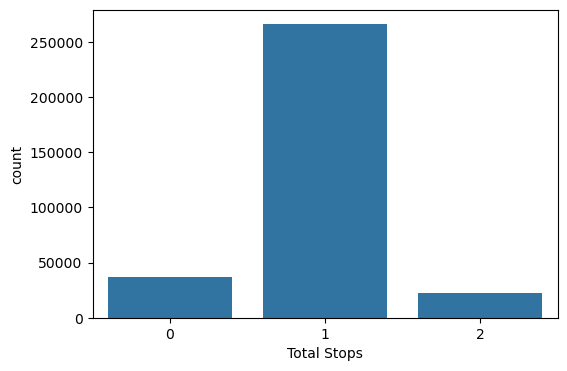

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total Stops", data=df)

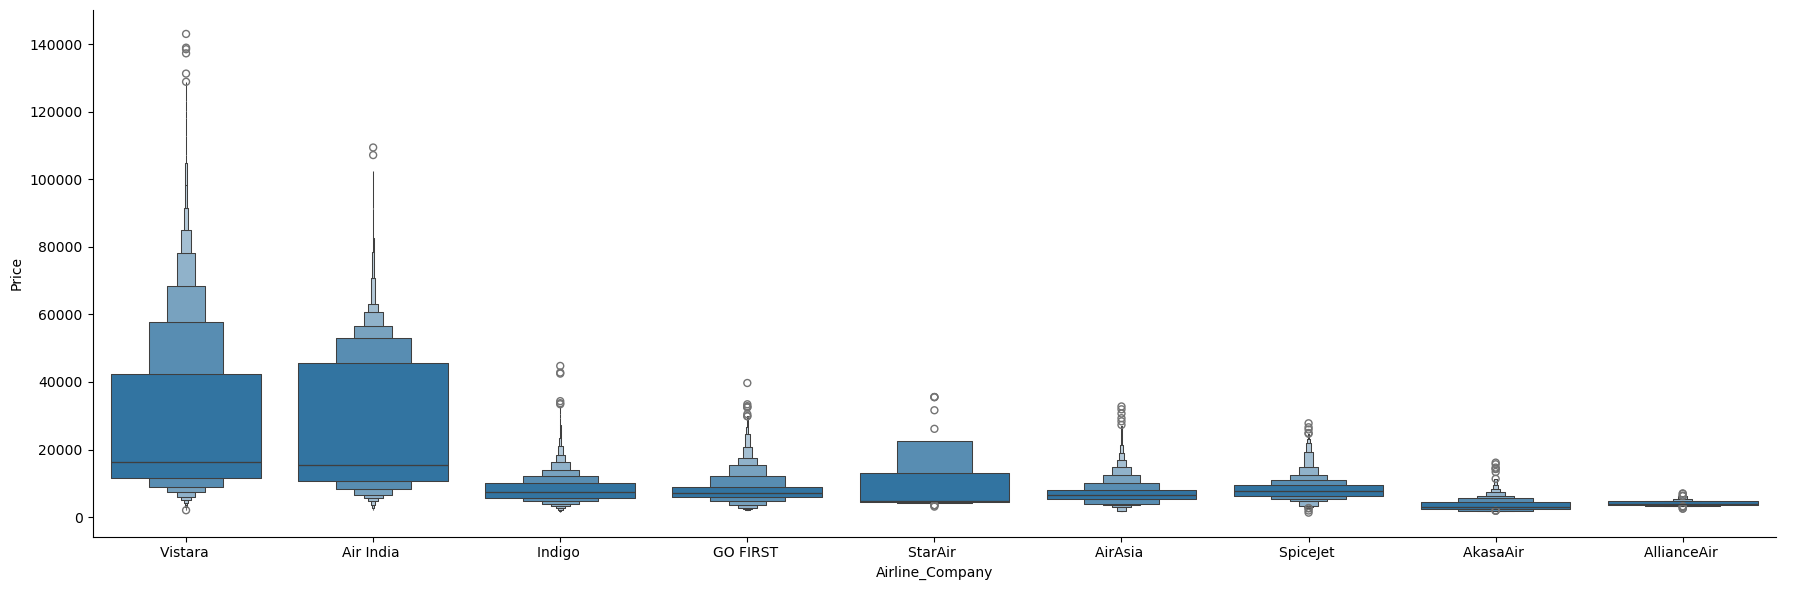

In [78]:
sns.catplot(y = "Price", x = "Airline_Company", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [79]:
df["Airline_Company"].value_counts()

Airline_Company
Vistara         166639
Air India        86212
Indigo           47045
AirAsia          11360
GO FIRST          7771
SpiceJet          4225
AkasaAir          1615
AllianceAir        275
StarAir             40
Name: count, dtype: int64

In [80]:
# columns = [col for col in df.columns if df[col].nunique()>3]
# plt.figure(figsize=(10,10))
# sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

# Fit and transform the data
encoded_features = ohe.fit_transform(df[['Airline_Company', 'Departure_City', 'Arrival_City']])

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Airline_Company', 'Departure_City', 'Arrival_City']))

# Concatenate the original DataFrame (excluding the original columns) with the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=['Airline_Company', 'Departure_City', 'Arrival_City']), encoded_df], axis=1)

df = df_encoded.copy()

In [82]:
df.head()

,StandardDateofBooking,Month_of_Journey,Flight_Number,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,...,Departure_City_Delhi,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai
0,2023-01-15,3,UK-979,BUSINESS,575.0,2,45817.0,2,3,13,...,1,0,0,0,0,1,0,0,0,0
1,2023-01-15,4,UK-858,ECONOMY,855.0,1,9028.0,2,4,6,...,0,0,0,0,0,0,0,1,0,0
2,2023-01-15,1,UK-858,PREMIUMECONOMY,1035.0,1,13635.0,25,1,6,...,0,0,0,0,0,0,0,0,0,0
3,2023-01-15,5,AI-574,ECONOMY,900.0,1,9634.0,2,5,21,...,0,0,0,0,0,0,1,0,0,0
4,2023-01-15,1,UK-926,BUSINESS,1600.0,1,57827.0,26,1,6,...,0,0,0,0,0,0,0,1,0,0


In [83]:
df.columns

Index(['StandardDateofBooking', 'Month_of_Journey', 'Flight_Number',
       'Flight_Class', 'Duration_in_mins', 'Total Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute',
       'Arrival_Hour', 'Arrival_Minute', 'Airline_Company_AirAsia ',
       'Airline_Company_AkasaAir ', 'Airline_Company_AllianceAir ',
       'Airline_Company_GO FIRST ', 'Airline_Company_Indigo ',
       'Airline_Company_SpiceJet ', 'Airline_Company_StarAir ',
       'Airline_Company_Vistara ', 'Departure_City_Bangalore',
       'Departure_City_Chennai', 'Departure_City_Delhi',
       'Departure_City_Hyderabad', 'Departure_City_Kolkata',
       'Departure_City_Mumbai', 'Arrival_City_Bangalore',
       'Arrival_City_Chennai', 'Arrival_City_Delhi', 'Arrival_City_Hyderabad',
       'Arrival_City_Kolkata', 'Arrival_City_Mumbai'],
      dtype='object')

In [84]:
df = df.drop(['StandardDateofBooking', 'Flight_Number'], axis=1)

In [85]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

encoder = OrdinalEncoder(categories=[['ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']])

df['Flight_Class_Encoded'] = encoder.fit_transform(df[['Flight_Class']])

df.head()

,Month_of_Journey,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,...,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Flight_Class_Encoded
0,3,BUSINESS,575.0,2,45817.0,2,3,13,25,23,...,0,0,0,0,1,0,0,0,0,2.0
1,4,ECONOMY,855.0,1,9028.0,2,4,6,40,20,...,0,0,0,0,0,0,1,0,0,0.0
2,1,PREMIUMECONOMY,1035.0,1,13635.0,25,1,6,40,23,...,0,0,0,0,0,0,0,0,0,1.0
3,5,ECONOMY,900.0,1,9634.0,2,5,21,15,12,...,0,0,0,0,0,1,0,0,0,0.0
4,1,BUSINESS,1600.0,1,57827.0,26,1,6,45,9,...,0,0,0,0,0,0,1,0,0,2.0


In [86]:
df = df.drop(['Flight_Class'], axis=1)

<Axes: >

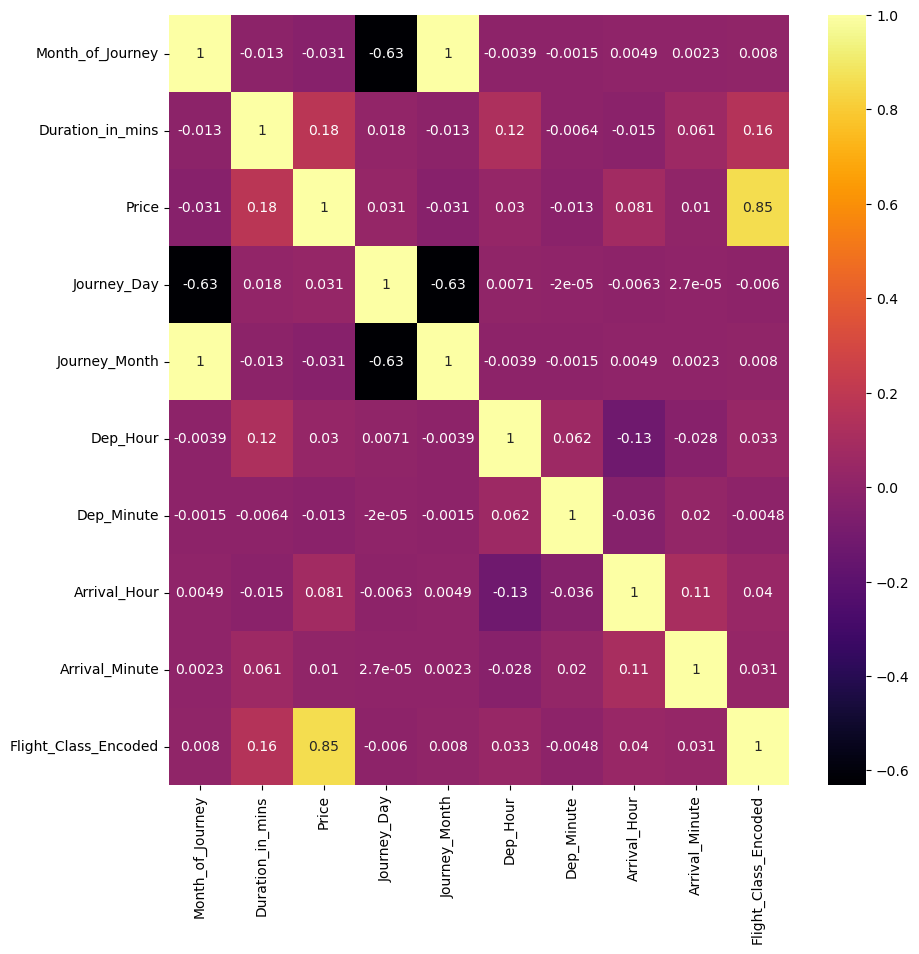

In [87]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(10,10))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [88]:
df.to_csv('final_transformed_train_data.csv', index = False)

## Model Implementation

In [89]:
import pandas as pd

# Load the transformed train and test data
train_df = pd.read_csv('final_transformed_train_data.csv')
test_df = pd.read_csv('final_transformed_test_data.csv')

# Ensure no index column
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Separate features and target
X_train = train_df.drop(['Price', 'Month_of_Journey'], axis=1)
y_train = train_df['Price']

X_test = test_df.drop(['Price', 'Month_of_Journey'], axis=1)
y_test = test_df['Price']


In [90]:
X_train.head()

,Duration_in_mins,Total Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Company_AirAsia,Airline_Company_AkasaAir,...,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Flight_Class_Encoded
0,575.0,2,2,3,13,25,23,0,0,0,...,0,0,0,0,1,0,0,0,0,2.0
1,855.0,1,2,4,6,40,20,55,0,0,...,0,0,0,0,0,0,1,0,0,0.0
2,1035.0,1,25,1,6,40,23,55,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,900.0,1,2,5,21,15,12,15,0,0,...,0,0,0,0,0,1,0,0,0,0.0
4,1600.0,1,26,1,6,45,9,25,0,0,...,0,0,0,0,0,0,1,0,0,2.0


In [91]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import pickle

# Assuming your data is already split into X_train, X_test, y_train, y_test

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2: {test_r2}")
    print("-" * 30)

# Initialize models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# List of models with variable names
models = [
    linear_reg_model,
    decision_tree_model,
    random_forest_model,
    gradient_boosting_model,
    xgb_model
]

# Train and evaluate each model
for model in models:
    train_evaluate_model(model, X_train, y_train, X_test, y_test)

# Save models to .pkl files
# with open('linear_reg_model.pkl', 'wb') as file:
#     pickle.dump(linear_reg_model, file)
# with open('decision_tree_model.pkl', 'wb') as file:
#     pickle.dump(decision_tree_model, file)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
# with open('gradient_boosting_model.pkl', 'wb') as file:df.drop(columns=['Duration_in_mins'], inplace=True)


Model: LinearRegression
Train MSE: 99590500.30784562
Test MSE: 99622366.15898389
Train RMSE: 9979.50401111426
Test RMSE: 9981.100448296465
Train MAE: 6885.372106698383
Test MAE: 6876.784958670728
Train R2: 0.758674327055711
Test R2: 0.759050035086186
------------------------------
Model: DecisionTreeRegressor
Train MSE: 173721.8706200865
Test MSE: 28548350.96865717
Train RMSE: 416.79955688566474
Test RMSE: 5343.065690093766
Train MAE: 27.192443777272267
Test MAE: 2279.869788035023
Train R2: 0.9995790406996355
Test R2: 0.9309520097799356
------------------------------
Model: RandomForestRegressor
Train MSE: 2371200.649951341
Test MSE: 15893768.426055713
Train RMSE: 1539.870335434559
Test RMSE: 3986.69893847726
Train MAE: 734.5763583395336
Test MAE: 1950.678360846114
Train R2: 0.9942541548564712
Test R2: 0.9615588035873904
------------------------------
Model: GradientBoostingRegressor
Train MSE: 42888736.61167118
Test MSE: 42757682.1965844
Train RMSE: 6548.949275393052
Test RMSE: 6538.9

In [92]:
y_pred = random_forest_model.predict(X_test)

results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Save the DataFrame to a CSV file
results_df.to_csv('y_test_y_pred.csv', index=False)

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations and limited parallel jobs
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=2)

# Fit the model using a subset of the data
subset_size = int(0.1 * X_train.shape[0])  # Use 10% of the data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

rf_random.fit(X_train_subset, y_train_subset)

# Print the best parameters and best score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tot

/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
57 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/growlt257/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score: 0.9299515969957154


In [94]:
# Get the best parameters
best_params = rf_random.best_params_

# Train the Random Forest with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R2:", r2)


Test MSE: 20890181.286752243
Test R2: 0.9494743134282376


In [95]:
# Random Forest Regression

#previous model

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Assuming X_train, y_train, X_test, y_test are already defined
# # Create the kfold object for cross-validation
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize the Random Forest Regressor with corrected max_features parameter
# rf_reg = RandomForestRegressor(
#     n_estimators=400,
#     min_samples_split=15,
#     min_samples_leaf=2,
#     max_features='sqrt',  # Changed from 'auto' to 'sqrt'
#     max_depth=30
# )

# # Fit the model
# rf_reg.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_reg.predict(X_test)

# # Training and testing accuracy
# print("Random Forest Score on Training set is", rf_reg.score(X_train, y_train))
# print("Random Forest Score on Test Set is", rf_reg.score(X_test, y_test))

# # Cross-validation accuracy
# accuracies = cross_val_score(rf_reg, X_train, y_train, cv=kfold)
# print(accuracies)
# print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

# # Error metrics
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)


# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

# rmse = np.sqrt(mse)
# print('RMSE:', rmse)

# r2 = r2_score(y_test, y_pred)
# print('The r2_score is', r2)

# r2_rf = r2_score(y_test, y_pred)

# # Distribution plot of residuals
# sns.histplot(y_test - y_pred, kde=True)
# plt.show()

# # Scatter plot of actual vs predicted values
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel("Actual Prices (y_test)")
# plt.ylabel("Predicted Prices (y_pred)")
# plt.show()


In [100]:
X_test_manual = pd.read_csv('ytest_manual.csv')
X_test_manual.head()

y_pred_on_manual = random_forest_model.predict(X_test_manual)
y_pred_on_manual = pd.DataFrame(y_pred_on_manual)
y_pred_on_manual.to_csv('y_pred_on_manual.csv')

In [102]:
mean_price_df = pd.read_csv('part-merged_1.csv')

mean_price = mean_price_df.groupby('Airline_Company')['Price'].mean()

# Print the result
print(mean_price)

Airline_Company
Air India       26935.705767
AirAsia          7083.850826
AkasaAir         3565.470074
AllianceAir      4076.250000
GO FIRST         8023.738138
Indigo           8199.612373
SpiceJet         8120.716052
StarAir          9801.333333
Vistara         27241.214467
Name: Price, dtype: float64


In [ ]:
print('=)

In [ ]:
#random forest prediction 
y_pred = random_forest_model.predict(X_test)
y_pred.to_csv('removing_null_then_prediction_rf.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
import pickle

with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)

In [ ]:
import joblib
import pandas as pd

# Assume df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Example of loading your data

# Here we use a sample DataFrame with column names for demonstration purposes
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'Month_of_Journey': [],
    'Duration_in_mins': [],
    'Total Stops': [],
    'Journey_Day': [],
    'Journey_Month': [],
    'Journey_DOW': [],
    'Dep_Hour': [],
    'Dep_Minute': [],
    'Arrival_Hour': [],
    'Arrival_Minute': [],
    'Airline_Company_AirAsia': [],
    'Airline_Company_AkasaAir': [],
    'Airline_Company_AllianceAir': [],
    'Airline_Company_GO FIRST': [],
    'Airline_Company_Indigo': [],
    'Airline_Company_SpiceJet': [],
    'Airline_Company_StarAir': [],
    'Airline_Company_Vistara': [],
    'Departure_City_Bangalore': [],
    'Departure_City_Chennai': [],
    'Departure_City_Delhi': [],
    'Departure_City_Hyderabad': [],
    'Departure_City_Kolkata': [],
    'Departure_City_Mumbai': [],
    'Arrival_City_Bangalore': [],
    'Arrival_City_Chennai': [],
    'Arrival_City_Delhi': [],
    'Arrival_City_Hyderabad': [],
    'Arrival_City_Kolkata': [],
    'Arrival_City_Mumbai': [],
    'Flight_Class_Encoded': []
})

# Get the column names
column_names = df.columns.tolist()

# Save the column names as a .pkl file
joblib.dump(column_names, 'column_names.pkl')

print("Column names have been saved to 'column_names.pkl'")


Column names have been saved to 'column_names.pkl'


In [ ]:
# Reindex the input DataFrame to match the training feature names
input_df = df.reindex(columns=training_feature_names, fill_value=0)

# Make the prediction
prediction = model.predict(input_df)


In [ ]:
import pandas as pd
manual_test  = pd.read_csv('manual_test_data.csv')
X_test = manual_test
y_pred = rf_reg.predict(X_test)


In [ ]:
import pandas as pd

y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])

y_pred_df.to_csv('manual_test_data_output.csv', index=False)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
xgbreg = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth = 10,min_child_weight =2,
                     colsample_bytree=0.9,gamma=0.01)

In [ ]:
param_grid = {
    'n_estimators': [550],
    'learning_rate': [0.01],
    'max_depth': [10],
    'min_child_weight': [2],
    'colsample_bytree': [0.9],
    'gamma': [0.01]
}

In [ ]:
grid_CV = GridSearchCV(estimator=xgbreg, param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [ ]:
grid_CV.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.01,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 550}

In [ ]:
y_pred = grid_CV.predict(X_test)

In [ ]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R^2 Score: {r2_score(y_test,y_pred):.4f}")

MAE: 2391.0875
MSE: 16627816.3220
RMSE: 4077.7220
R^2 Score: 0.9599


In [ ]:
import streamlit as st 
import pickle

model = pickle.load(open("random_forest_model.pkl", "rb"))
model_features = model.get_booster().feature_names if hasattr(model, 'get_booster') else model.feature_names_in_
st.write("Model Feature Names: ", model_features)


In [ ]:
model_features

array(['Total Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_in_mins',
       'Airline_Company_AirAsia ', 'Airline_Company_AkasaAir ',
       'Airline_Company_AllianceAir ', 'Airline_Company_GO FIRST ',
       'Airline_Company_Indigo ', 'Airline_Company_SpiceJet ',
       'Airline_Company_StarAir ', 'Airline_Company_Vistara ',
       'Departure_City_Bangalore', 'Departure_City_Chennai',
       'Departure_City_Delhi', 'Departure_City_Hyderabad',
       'Departure_City_Kolkata', 'Departure_City_Mumbai',
       'Arrival_City_Bangalore', 'Arrival_City_Chennai',
       'Arrival_City_Delhi', 'Arrival_City_Hyderabad',
       'Arrival_City_Kolkata', 'Arrival_City_Mumbai',
       'Flight_Class_Encoded'], dtype=object)

In [ ]:
importances = random_forest_model.feature_importances_
feature_names = model_features  # Assuming model_features contains the feature names in the correct order
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

st.write("Feature Importances:")
st.write(feature_importance_df)

In [ ]:
feature_importance_df.sort_values

<bound method DataFrame.sort_values of                          Feature    Importance
28          Flight_Class_Encoded  7.997651e-01
7               Duration_in_mins  5.757047e-02
1                    Journey_Day  2.457204e-02
2                  Journey_Month  1.955892e-02
5                   Arrival_Hour  1.694490e-02
3                       Dep_Hour  1.184490e-02
15      Airline_Company_Vistara   1.147264e-02
6                 Arrival_Minute  1.120075e-02
4                     Dep_Minute  9.439377e-03
18          Departure_City_Delhi  4.318099e-03
20        Departure_City_Kolkata  4.176452e-03
24            Arrival_City_Delhi  4.054740e-03
27           Arrival_City_Mumbai  3.169097e-03
16      Departure_City_Bangalore  2.593901e-03
26          Arrival_City_Kolkata  2.542154e-03
0                    Total Stops  2.530403e-03
21         Departure_City_Mumbai  2.289590e-03
22        Arrival_City_Bangalore  2.229232e-03
23          Arrival_City_Chennai  1.870973e-03
25        Arrival_Cit

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataframe.csv' with the path to your dataset
df = pd.read_csv('part-merged_1.csv')

# Print the 'Airline_Company' wise 'Flight_Class'
airline_flight_class_distribution = df.groupby(['Airline_Company', 'Flight_Class']).size().unstack(fill_value=0)

airline_flight_class_distribution


Flight_Class,BUSINESS,ECONOMY,FIRST,PREMIUMECONOMY
Airline_Company,,,,
Air India,52052,67030,148,0
AirAsia,0,15702,0,0
AkasaAir,0,2209,0,0
AllianceAir,0,396,0,0
GO FIRST,0,10741,0,0
Indigo,0,65354,0,0
SpiceJet,0,5845,0,0
StarAir,0,61,0,0
Vistara,74146,83361,0,72653


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_dataframe.csv' with the path to your dataset
df = pd.read_csv('part-merged_1.csv')

# Print the 'Airline_Company' wise 'Flight_Class'
airline_flight_class_distribution = df.groupby(['Flight_Class', 'Airline_Company']).size().unstack(fill_value=0)

airline_flight_class_distribution

Airline_Company,Air India,AirAsia,AkasaAir,AllianceAir,GO FIRST,Indigo,SpiceJet,StarAir,Vistara
Flight_Class,,,,,,,,,
BUSINESS,52052,0,0,0,0,0,0,0,74146
ECONOMY,67030,15702,2209,396,10741,65354,5845,61,83361
FIRST,148,0,0,0,0,0,0,0,0
PREMIUMECONOMY,0,0,0,0,0,0,0,0,72653


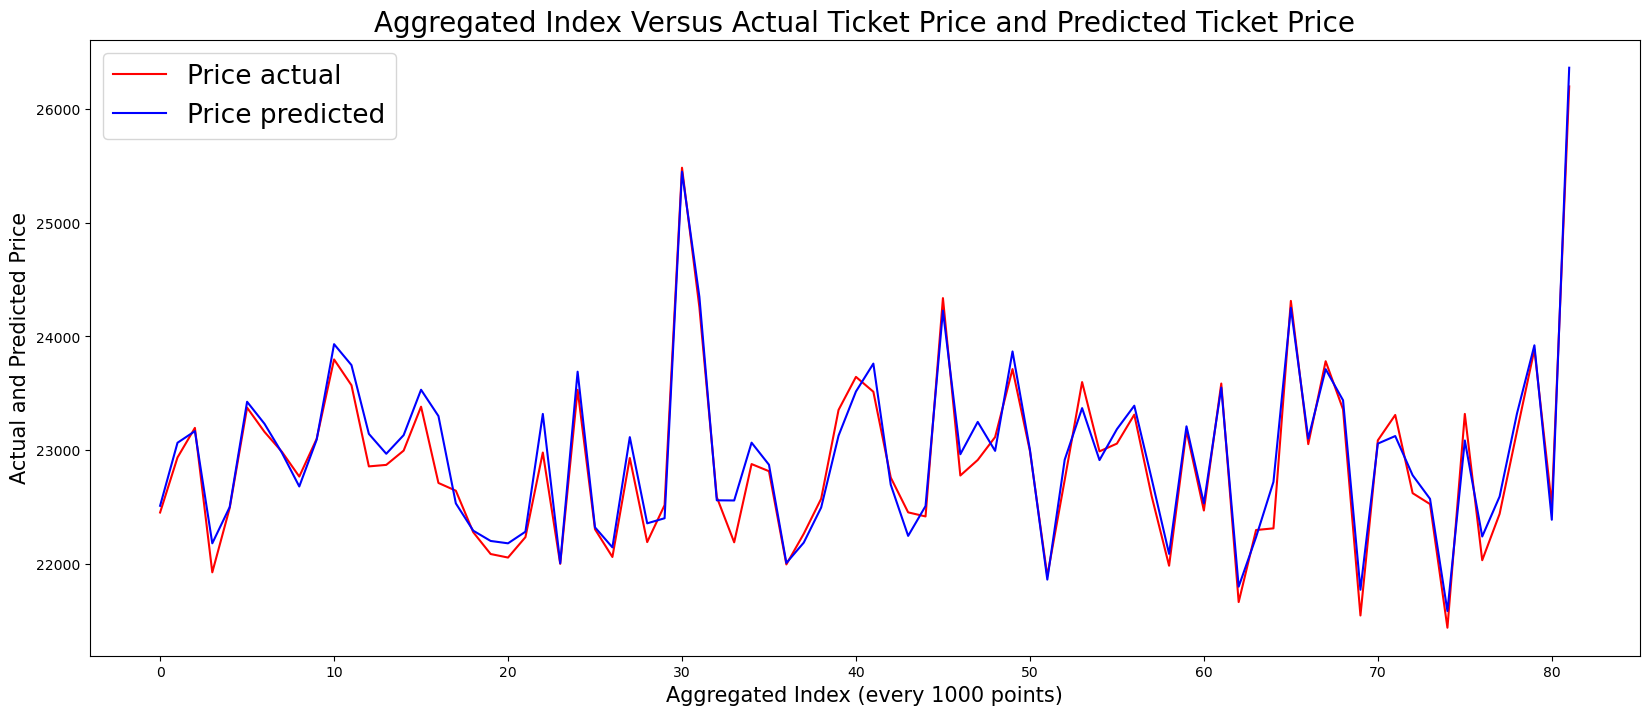

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
diff = pd.read_csv('y_test_y_pred.csv')

# Aggregating the data
diff['Index'] = diff.index
agg_data = diff.groupby(diff.index // 1000).mean()

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(agg_data.index, agg_data['y_test'], color='red', label='Price actual')
plt.plot(agg_data.index, agg_data['y_pred'], color='blue', label='Price predicted')
plt.title('Aggregated Index Versus Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(fontsize=19)
plt.xlabel('Aggregated Index (every 1000 points)', fontsize=15)
plt.ylabel('Actual and Predicted Price', fontsize=15)
plt.show()
